<font color='blue'> **15_LAK** </font> <font color='red'> **MVR** </font> 

In [1]:
from modflow_devtools.misc import get_env;write=get_env("WRITE",True);run=get_env("RUN",True);plot=get_env("PLOT",True);plot_show=get_env("PLOT_SHOW",True);plot_save=get_env("PLOT_SAVE",True) 
import os      ; import matplotlib.pyplot as plt      ; import numpy as np  ; import pickle   ; from pathlib import Path ; import pathlib as pl   ; import matplotlib as mpl

import flopy   ; from flopy.plot.styles import styles ; import pandas as pd                   ; EX = 'E:\\15_REPOS\\00_BETAMI\\bin\\mf6.exe'    ; import shapefile as shp      ; ID = 'e15'
_R=Path("./_R");_R.mkdir(exist_ok=True);T15=Path("./_R/T15");T15.mkdir(exist_ok=True);T15b=Path("./_R/T15/b");T15b.mkdir(exist_ok=True) ;REF1='E:/15_REPOS/02_Beta-Me/data/MF6/15_ex-gwf-lak-p02'

In [ ]:
length_units="feet"; time_units="days"  ; nper=1; nlay=5; nrow=27; ncol=17  ; top=200; strt=115; k11=30; k33=30; ss=0.0003; sy=0.2 ; recharge=0.0116; etvrate=0.0141; etvdepth=15
lak_strt=130; lak_etrate=0.0103         ; H1=160; H2=140                    ; lak_bedleak=0.1; nouter=500; ninner=100; hclose=0.000000001; rclose=0.000001  
botm_str = "102., 97., 87., 77., 67."   ; botm = [float(value) for value in botm_str.split(",")]                        ; tdis_ds = ((1500.0, 200, 1.005),)  ; SP3D=(nlay,nrow,ncol) 
delr=np.array([250.0,1000.0,1000.0,1000.0,1000.0,1000.0,500.0,500.0,500.0,500.0,500.00,1000.0,1000.0,1000.0,1000.0,1000.0,250.0])
delc=np.array([250.0,1000.0,1000.0,1000.0,1000.0,1000.0,500.0,500.0,500.0,500.0,500.0,1000.0,1000.0,1000.0,1000.0,1000.0,500.0,500.0,500.0,500.0,500.0,1000.0,1000.0,1000.0,1000.0,1000.0,250.0])
LAK_M = np.ones(SP3D,dtype=int)*-1   ; LAK_M[0,:,:] = np.loadtxt(os.path.join(REF1 ,'lakes-01.txt'),dtype=int)-1    ; LAK_M[1,:,:] =np.loadtxt(os.path.join(REF1 ,'lakes-02.txt'),dtype=int)-1
xlen = delr.sum() - 0.5 * (delr[0] + delr[-1])    ; x = 0.0   ; s1d = H1 * np.ones(ncol, dtype=float)
for idx in range(1, ncol):
    x += 0.5 * (delr[idx - 1] + delr[idx])           ; frac = x / xlen                                 ; s1d[idx] = H1 + (H2 - H1) * frac
SURF = np.tile(s1d, (nrow, 1))                       ; SURF[LAK_M[0, :, :] > -1] = botm[0] - 2         ; SURF[LAK_M[1, :, :] > -1] = botm[1] - 2                ; CHD_S = []
for k in range(nlay):                                  CHD_S += [[k, i, 0, H1] for i in range(nrow)]   ; CHD_S += [[k, i, ncol - 1, H2] for i in range(nrow)]
LAK_O = [[0,0,-1,"manning",114.85,5.0,0.05,8.206e-4],  [1,1,-1,"manning",109.42,5.0,0.05,9.458e-4]]  
LAK_S = [[0,"rainfall",recharge]                    ,  [0,"evaporation",lak_etrate] , [1,"rainfall",recharge]           , [1,"evaporation",lak_etrate]]
MVR_P = [["SFR-1"],["LAK-1"]]   ;MVR_S=[["SFR-1",7,"LAK-1",0,"FACTOR",1.0]          , ["LAK-1",0,"SFR-1",8,"FACTOR",1.0], ["SFR-1",13,"LAK-1",1,"FACTOR",1.0],  ["LAK-1",1,"SFR-1",14,"FACTOR",0.5]]

SFR_P=[[0,0,1,4,1000,5,0.001103448,123.94827,0.5,0.5,0.050000001,1,1,0],[1,0,2,4,1000,5,0.001103448,122.84483,0.5,0.5,0.050000001,2,1,0],[2,0,3,4,1000,5,0.001103448,121.74138,0.5,0.5,0.050000001,2,1,0],[3,0,3,5,1000,5,0.001103448,120.63793,0.5,0.5,0.050000001,2,1,0],[4,0,3,6,500,5,0.001103448,119.81035,0.5,0.5,0.050000001,2,1,0],[5,0,3,7,750,5,0.001103448,119.12069,0.5,0.5,0.050000001,2,1,0],[6,0,4,7,1000,5,0.001103448,118.15517,0.5,0.5,0.050000001,2,1,0],[7,0,5,7,1000,5,0.001103448,117.05173,0.5,0.5,0.050000001,1,1,0],[8,0,11,8,1000,5,0.000820632,114.43968,0.5,0.5,0.050000001,1,1,0],[9,0,12,8,1000,5,0.000820632,113.61905,0.5,0.5,0.050000001,2,1,0],[10,0,13,9,559,5,0.000820632,112.97937,0.5,0.5,0.050000001,2,1,0],[11,0,13,9,559,5,0.000820632,112.52063,0.5,0.5,0.050000001,2,1,0],[12,0,14,9,1000,5,0.000820632,111.88095,0.5,0.5,0.050000001,2,1,0],[13,0,15,9,1000,5,0.000820632,111.06032,0.5,0.5,0.050000001,1,1,0],[14,0,21,9,1000,5,0.00094582,108.95569,0.5,0.5,0.050000001,1,1,0],[15,0,22,9,750,5,0.00094582,108.1281,0.5,0.5,0.050000001,2,1,0],[16,0,22,10,500,5,0.00094582,107.53696,0.5,0.5,0.050000001,2,1,0],[17,0,22,11,1000,5,0.00094582,106.82759,0.5,0.5,0.050000001,2,1,0],[18,0,22,12,1000,5,0.00094582,105.88177,0.5,0.5,0.050000001,2,1,0],[19,0,22,13,1000,5,0.00094582,104.93595,0.5,0.5,0.050000001,2,1,0],[20,0,22,14,1000,5,0.00094582,103.99014,0.5,0.5,0.050000001,2,1,0],[21,0,22,15,1000,5,0.00094582,103.04431,0.5,0.5,0.050000001,1,1,0]]
SFR_C=[[0,-1],[1,0,-2],[2,1,-3],[3,2,-4],[4,3,-5],[5,4,-6],[6,5,-7],[7,6],[8,-9],[9,8,-10],[10,9,-11],[11,10,-12],[12,11,-13],[13,12],[14,-15],[15,14,-16],[16,15,-17],[17,16,-18],[18,17,-19],[19,18,-20],[20,19,-21],[21,20]]
SFR_S=[[0,"inflow",691200.0]]
pd.DataFrame(SURF).to_csv (T15/"01_SURF.csv")                         ; pd.DataFrame(CHD_S).to_csv(T15/"02_CHD_S.csv") 
np.savetxt(T15 / "03_delr.csv", delr, delimiter=",")                  ; np.savetxt(T15/"04_delcT.csv",delc.T   , delimiter=",") ; np.savetxt(T15/"05_botm.csv", botm, delimiter=",")  
np.savetxt(T15 / "06_sfr_pakdata.csv" , SFR_P       , delimiter=",")  ; np.savetxt(T15 / "07_MVR_S.csv" ,MVR_S , delimiter=","  , fmt ="%s")  
np.savetxt(T15 / "08_LAK_O.csv" , LAK_O , fmt ="%s" , delimiter=",")  ; np.savetxt(T15 / "08_LAK_S.csv" ,LAK_S , delimiter=","  , fmt ="%s")  

In [ ]:
def build_models():
    global LAK_I, LAK_D, LAK_C , LAK_P  
    OF1=f"{ID}.gwf.obs" ;CSV1=OF1+".csv" ; OS=[["A","head",(0,3,3)],["B","head",(0,13,8)],["C","head",(0,23,13)]]   ;OBS_D={CSV1:OS}
    OF2=f"{ID}.lak.obs" ;CSV2=OF2+".csv" ; OBS_D2={CSV2:[("lake1","stage",(0,)),("lake2","stage",(1,))]}
    
    sim = flopy.mf6.MFSimulation  (sim_name=ID, sim_ws=T15b, exe_name="mf6")
    flopy.mf6.ModflowTdis   (sim, nper=nper, perioddata=tdis_ds, time_units=time_units)                                                                      ; aa= "summary";  bb= "bicgstab"
    flopy.mf6.ModflowIms    (sim,print_option=aa,linear_acceleration=bb,outer_maximum=nouter,outer_dvclose=hclose,inner_maximum=ninner,inner_dvclose=hclose,rcloserecord=f"{rclose} strict")
    gwf = flopy.mf6.ModflowGwf    (sim, modelname=ID, newtonoptions="newton", save_flows=True)
    flopy.mf6.ModflowGwfdis (gwf,length_units=length_units,nlay=nlay,nrow=nrow,ncol=ncol,delr=delr,delc=delc,idomain=np.ones(SP3D, dtype=int),top=top,botm=botm)
    flopy.mf6.ModflowUtlobs (gwf, filename=OF1, print_input=False, continuous=OBS_D)                 ; flopy.mf6.ModflowGwfnpf  (gwf,icelltype=1,k=k11,k33=k33,save_specific_discharge=True)
    flopy.mf6.ModflowGwfsto (gwf,iconvert=1,sy=sy,ss=ss)    ; flopy.mf6.ModflowGwfic(gwf, strt=strt) ; flopy.mf6.ModflowGwfchd  (gwf, stress_period_data=CHD_S)
    flopy.mf6.ModflowGwfrcha(gwf, recharge=recharge)                                                 ; flopy.mf6.ModflowGwfevta (gwf, surface=SURF, rate=etvrate, depth=etvdepth)
    (LAK_I, LAK_D, LAK_C) = flopy.mf6.utils.get_lak_connections(gwf.modelgrid, LAK_M, bedleak=lak_bedleak)                     ; gwf.dis.idomain = LAK_I  ; LAK_P = []  
    for key in LAK_D.keys():  LAK_P.append([key, lak_strt, LAK_D[key]])
    lak = flopy.mf6.ModflowGwflak(gwf,pname="LAK-1",time_conversion=86400.0,length_conversion=3.28081,mover=True,print_stage=True,nlakes=2,
        noutlets=len(LAK_O),packagedata=LAK_P,connectiondata=LAK_C,outlets=LAK_O,perioddata=LAK_S)        ; lak.obs.initialize(filename=OF2, digits=10, print_input=True, continuous=OBS_D2)                
    flopy.mf6.ModflowGwfsfr (gwf,pname="SFR-1",time_conversion=86400.000,length_conversion=3.28081,mover=True,print_stage=True,print_flows=True,
                                                                                                             nreaches=len(SFR_P),packagedata=SFR_P,connectiondata=SFR_C,perioddata=SFR_S)
    flopy.mf6.ModflowGwfmvr (gwf,maxmvr=4,maxpackages=2,packages=MVR_P,perioddata=MVR_S)                                        ; HF=f"{ID}.hds" ;BF=f"{ID}.cbc"
    flopy.mf6.ModflowGwfoc  (gwf,head_filerecord=HF,budget_filerecord=BF,saverecord=[("HEAD", "LAST"), ("BUDGET", "LAST")])     ; return sim
def write_models(sim, silent=True):   sim.write_simulation(silent=silent)
def run_models(sim, silent=True):     success, buff = sim.run_simulation(silent=silent)  ; assert success, buff
def scenario(silent=True):  
    sim = build_models()
    if write: write_models(sim, silent=silent)
    if run:   run_models  (sim, silent=silent)
scenario()

In [4]:
sim=flopy.mf6.MFSimulation.load(sim_ws=T15b,exe_name=EX,verbosity_level=0) ;gwf = sim.get_model(ID)  ; HOBJ = gwf.output.head()    ; KS = HOBJ.get_kstpkper()  
head = HOBJ.get_data(kstpkper=KS[0]) ; cobj = gwf.output.budget()          ;qx,qy,qz = flopy.utils.postprocessing.get_specific_discharge(cobj.get_data(text="DATA-SPDIS",kstpkper=KS[0])[0], gwf)

xcenters, ycenters = XC, YC     = gwf.modelgrid.xycenters[0], gwf.modelgrid.xycenters[1]         ; p1=(XC[3], YC[3]) ; p2 = (XC[8], YC[13]) ; p3 = (XC[13], YC[23])
xedges, yedges     = X_ED, Y_ED = gwf.modelgrid.xyedges[0], gwf.modelgrid.xyedges[1]             ; LAK_R = gwf.lak.output.obs().data  ; GWF_R = gwf.obs[0].output.obs().data

<font color='orange'> **PLOT_01 _____________________________________________________________________________________________** </font> 

In [5]:
fig=plt.figure(figsize=(3, 4),dpi=200)              
ax=fig.add_subplot(111, aspect="equal") ;mm=flopy.plot.PlotMapView(gwf, ax=ax) ; mm.plot_bc("CHD", color="cyan") ; mm.plot_inactive(color_noflow="yellow")             ;mm.plot_grid(lw=0.25)
VV1=np.min(head[0]) ; VV2=np.min(head[0])*1.9      ; cv=mm.contour_array(head,levels=np.arange(VV1,VV2,10),linewidths=0.5,linestyles="-",colors="blue")               ; plt.clabel(cv, fmt="%1.0f")
styles.add_text(ax,"A",x=p1[0]+150,y=p1[1]+150,transform=False) ;styles.add_text(ax,"B",x=p2[0]+150,y=p2[1]+150,transform=False)   ;styles.add_text(ax,"C",x=p3[0]+150,y=p3[1]+150,transform=False)

W0 = [[XC[4],Y_ED[1]] ,[XC[4],YC[4]]   ,[XC[7],YC[4]]     ,[XC[7],Y_ED[6]]]        ;W1 = [[XC[8],Y_ED[11]],[XC[8],Y_ED[13]],[XC[9],Y_ED[14]]  ,[XC[9],Y_ED[16]]]
W2 = [[XC[9],Y_ED[21]],[XC[9],YC[22]]  ,[X_ED[16],YC[22]]]     ;parts=[W0,W1,W2]   ;SH = os.path.join(T15,"SFR.shp");
SFR=shp.Reader(SH)
for shape in SFR.shapeRecords():
    XX = [i[0] for i in shape.shape.points[:]]       ; YY = [i[1] for i in shape.shape.points[:]]  ; ax.plot(XX, YY, color="#EE8C1D", lw=3, zorder=1)
mm.plot_vector(qx, qy, normalize=False, color="0.1") ; ax.set_xlabel("x(ft)") ; ax.set_ylabel("y(ft)") ; plt.close() # plt.show()

fig.savefig(T15 / '_FIG1') ; os.startfile(T15 / '_FIG1.png') # _________________________________________________________________________________________ #  HEADS L1,2
#_______ MM=shp.Writer(target=SH,shapeType=shp.POLYLINE) ; MM.field('no','C') ;MM.line([W0]) ;MM.record(['1']);MM.line([W1]) ;MM.record(['2']) ;MM.line([W2]) ;MM.record(['3']) ;MM.close(); 

<function matplotlib.pyplot.show(close=None, block=None)>

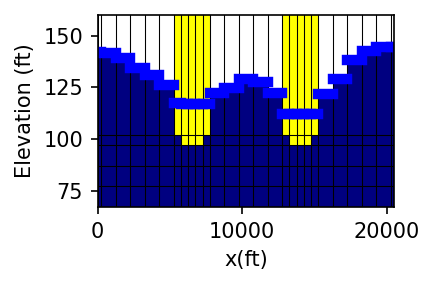

In [6]:
from flopy.utils.postprocessing import get_water_table  ; ALL = HOBJ.get_alldata()[0] ; wt = get_water_table(ALL) 
fig, ax = plt.subplots(1, 1, figsize=(3, 2), dpi=150, tight_layout=True)                        
XS = flopy.plot.PlotCrossSection(gwf, ax=ax, line={"column": 8})    ; XS.plot_array(np.ones(SP3D), head=head, cmap="jet")  ; ax.set_xlabel("x(ft)")                   
ax.set_ylim(67, 160)   ;  ax.set_ylabel("Elevation (ft)")           ; XS.plot_bc("CHD", color="cyan", head=head) ; XS.plot_ibound(color_noflow="yellow", head=head)   
XS.plot_grid(lw=0.5, color="black")                                 ; XS.plot_surface(wt, masked_values=[1e30], color="blue", lw=5)  ; plt.show

,LAKE1,LAKE2,A,B,C
time(days),,,,,
4.382077,122.542272,121.033554,115.245032,115.331696,115.232058
8.786065,119.548939,116.755947,115.501377,115.656248,115.454801
13.212072,118.115755,114.493311,115.771193,115.943353,115.667153
17.660209,117.355780,113.200435,116.056322,116.190425,115.869815
22.130588,116.926018,112.417441,116.358325,116.403755,116.064249


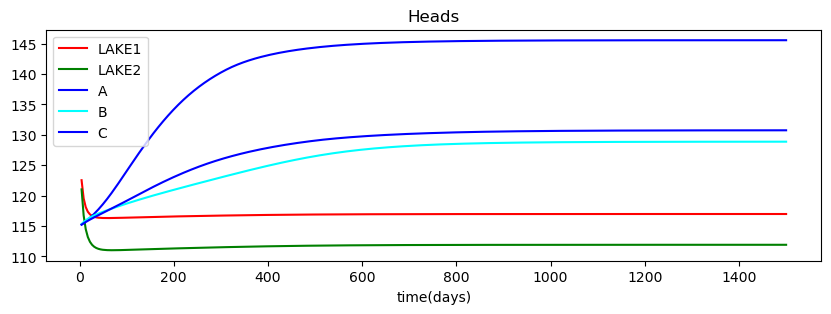

In [7]:
df1 = pd.DataFrame(LAK_R) ; df2=pd.DataFrame(GWF_R)  ; df3 = df2.drop('totim', axis=1)   
df = pd.concat([df1[:], df3[:]], axis=1)  ; df.set_index('totim', inplace=True, drop=True) ; df.index.name = 'time(days)'  
ax = df.plot(use_index=True, y= list(df) , kind="line", rot=0, figsize=(10,3), color=['red','green','blue','cyan','blue'], title='Heads') ; df.head() 

In [ ]:
ab=pd.DataFrame(LAK_C) ;ab =ab .rename(columns=lambda x :'a'+str(x))  ;ab2=ab['a2'];ab3=ab2.tolist()                 ; np.savetxt(T15 / "07a_LAK_C_n.csv", ab3, delimiter=",")  
ab4=pd.DataFrame(ab3)  ;ab5=ab4.rename(columns=lambda x :'b'+str(x))  ;DF=pd.concat([ab[:],ab5[:]], axis=1)  ; DF.to_csv (T15 / "07b_LAK_C.csv") ;DF.head() 

,a0,a1,a2,a3,a4,a5,a6,a7,a8,b0,b1,b2
0,0,0,"(0, 5, 6)",horizontal,0.1,102.0,200.0,500.0,500.0,0,5,6
1,0,1,"(0, 6, 5)",horizontal,0.1,102.0,200.0,500.0,500.0,0,6,5
2,0,2,"(1, 6, 6)",vertical,0.1,0.0,0.0,0.0,0.0,1,6,6
3,0,3,"(0, 5, 7)",horizontal,0.1,102.0,200.0,500.0,500.0,0,5,7
4,0,4,"(1, 6, 7)",vertical,0.1,0.0,0.0,0.0,0.0,1,6,7


In [10]:
pd.DataFrame(os.listdir(T15/'b')).to_csv(T15/"L15_LIST.csv")  
LAK_P = []  
for key in LAK_D.keys():  LAK_P.append([key, lak_strt, LAK_D[key]]); print('LAK_P',LAK_P)

LAK_P [[0, 130, 57]]
LAK_P [[0, 130, 57], [1, 130, 57]]
